# Natural Language Processing with Disaster Tweets

Jupyter notebook

https://github.com/alex80ds/Boulder-CU/blob/main/Disaster_tweets.ipynb

PDF file

https://github.com/alex80ds/Boulder-CU/blob/main/Disaster_tweets.pdf

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# EDA

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

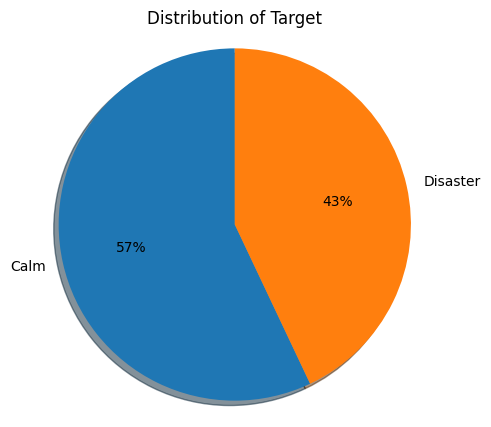

In [7]:
import matplotlib.pyplot as plt

calm, disaster = train['target'].value_counts()
calm, disaster

fig = plt.figure(figsize=(5,5))
labels = 'Calm', 'Disaster'
sizes = [calm, disaster]
plt.pie(sizes, labels=labels, autopct='%0.0f%%',
        shadow=True, startangle=90)
plt.title('Distribution of Target')
plt.axis('equal')
plt.show()

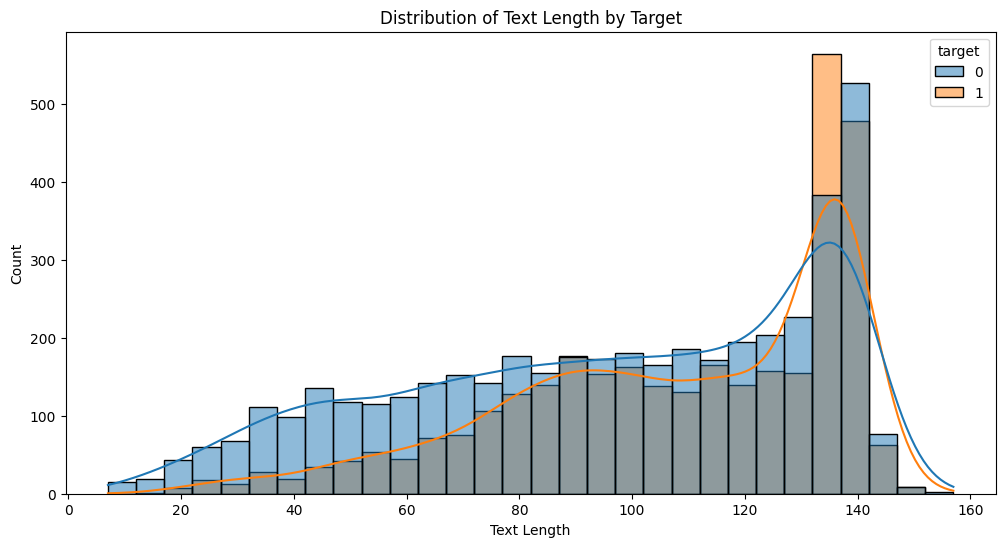

In [8]:
import seaborn as sns

train['text_length'] = train['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='text_length', hue='target', bins=30, kde=True)
plt.title('Distribution of Text Length by Target')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

# DATA PREPROCESSING

In [9]:
train.drop(['id','keyword', 'location'], axis = 1, inplace=True)
train.head()

,text,target,text_length
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [10]:
import re
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')


def preprocess_text(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\w\s\d]', '', text)
    
    tokens = word_tokenize(text)

    clean_tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if re.sub(r'[^a-zA-Z0-9]', '', token)]

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in clean_tokens if token not in stop_words]

    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text

train['text'] = train['text'].apply(preprocess_text)
test['text'] = test['text'].apply(preprocess_text)
test.drop(['keyword', 'location'], axis = 1, inplace=True)
train


[nltk_data] Downloading package punkt to /home/alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,target,text_length
0,deed reason earthquak may allah forgiv us,1,69
1,forest fire near la rong sask canada,1,38
2,resid ask shelter place notifi offic evacu she...,1,133
3,peopl receiv wildfir evacu order california,1,65
4,got sent photo rubi alaska smoke wildfir pour ...,1,88
...,...,...,...
7608,two giant crane hold bridg collaps nearbi home...,1,83
7609,ariaahrari thetawniest control wild fire calif...,1,125
7610,volcano hawaii http co,1,65
7611,polic investig e bike collid car littl portug ...,1,137


In [11]:
test

,id,text
0,0,happen terribl car crash
1,2,heard earthquak differ citi stay safe everyon
2,3,forest fire spot pond gees flee across street ...
3,9,apocalyps light spokan wildfir
4,11,typhoon soudelor kill china taiwan
...,...,...
3258,10861,earthquak safeti lo angel safeti fasten xrwn
3259,10865,storm ri wors last hurrican citi amp hardest h...
3260,10868,green line derail chicago http co utbxlcbiuy
3261,10874,meg issu hazard weather outlook hwo http co


# MODELS

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')


tfidf = TfidfVectorizer()
X = tfidf.fit_transform(train['text'])

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, train['target'], test_size=0.2, random_state=42)

### Random Forest

In [25]:
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, None]}
random_forest = RandomForestClassifier()
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

0.7816091954022987

In [30]:
pred_rf_val = grid_search_rf.predict(X_valid)
print("Random Forest Accuracy:", accuracy_score(y_valid, pred_rf_val))

Random Forest Accuracy: 0.7905449770190414


### Logistic Regression

In [40]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logistic_regression = LogisticRegression()
grid_search_lr = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search_lr.fit(X_train, y_train)
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

In [32]:
pred_lr_val = grid_search_lr.predict(X_valid)
print("Logistic Regression Accuracy:", accuracy_score(y_valid, pred_lr_val))

Logistic Regression Accuracy: 0.7957977675640184


### Support Vector Machine

In [33]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

In [34]:
pred_svm_val = grid_search_svm.predict(X_valid)
print("Support Vector Machine Accuracy:", accuracy_score(y_valid, pred_svm_val))

Support Vector Machine Accuracy: 0.7951411687458962


### Naive Bayes

In [35]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [36]:
pred_nb_val = naive_bayes.predict(X_valid)
print("Naive Bayes Accuracy:", accuracy_score(y_valid, pred_nb_val))

Naive Bayes Accuracy: 0.8069599474720945


### XGBoost

In [37]:
param_grid = {'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7], 'n_estimators': [100, 200, 300]}
xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(xgb, param_grid, cv=5)
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

In [39]:
pred_xgb_val = grid_search_xgb.predict(X_valid)
print("XGBoost Accuracy:", accuracy_score(y_valid, pred_xgb_val))

XGBoost Accuracy: 0.7846355876559422


All values are very close, but it showed better NAIVE BAYES = 0.807

# Predict on test set

In [41]:
X_test = tfidf.transform(test['text'])
test['target'] = grid_search_xgb.predict(X_test)

In [42]:
test[['id', 'target']].to_csv('submission_AL.csv', index=False)

### Result and conclusion

The study on disaster tweets utilized various machine learning models to classify tweets into disaster and non-disaster categories. The models tested include Random Forest, Logistic Regression, Support Vector Machine, Naive Bayes, and XGBoost. Naive Bayes demonstrated the highest accuracy at approximately 80.7%. The document concludes by applying the chosen model to predict disaster relevance on a test dataset, producing a submission file for evaluation. This study illustrates the effectiveness of Naive Bayes for text classification tasks in the context of natural disaster tweet analysis.